In [99]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [101]:
X_train.shape   # 50000 sample, 32*32 image, 3 is rgb

(50000, 32, 32, 3)

In [102]:
X_test.shape

(10000, 32, 32, 3)

In [103]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

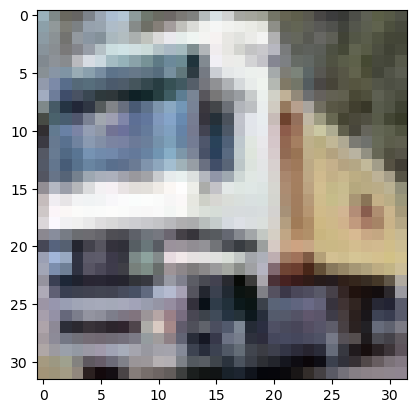

In [104]:
plt.imshow(X_train[1])

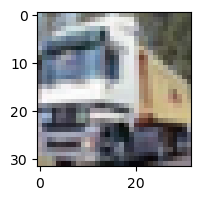

In [105]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [106]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [147]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.title(y[index])
    #y[index] = y[index].reshape(-1,)
    #plt.xlabel(classes[y[index]])  #y is being used for name of the image using classes list above

C:\Users\chauzani\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


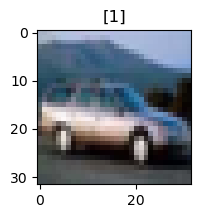

In [148]:
plot_sample(X_train, y_train, 4)

In [109]:
X_train = X_train/255   # to normalize the data 
X_test = X_test/255 

In [110]:
ANN = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid')
    ])

ANN.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ANN.fit(X_train, y_train, epochs = 5)

Epoch 1/5


1563/1563 [==============================] - 54s 34ms/step - loss: 1.8108 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6212 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5402 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4771 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4309 - accuracy: 0.4957


In [112]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4451 - accuracy: 0.4844


[1.4451435804367065, 0.4844000041484833]

In [116]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.51      0.56      1000
           1       0.65      0.52      0.58      1000
           2       0.38      0.41      0.39      1000
           3       0.40      0.17      0.24      1000
           4       0.46      0.39      0.42      1000
           5       0.32      0.55      0.41      1000
           6       0.61      0.39      0.47      1000
           7       0.48      0.64      0.55      1000
           8       0.63      0.59      0.61      1000
           9       0.47      0.68      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [126]:
CNN = models.Sequential([
    
        #cnn
        layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')  #will normalize probability
    ])

In [127]:
#Softmax gives probability range between 0-1
a = 0.45
b = 0.67
    
#a: (0.45) / (0.45 + 0.67)
#b: (0.67) / (0.45 + 0.67)    

In [128]:
(0.45) / (0.45 + 0.67)
(0.67) / (0.45 + 0.67)

0.5982142857142857

In [130]:
CNN.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

CNN.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5094 - accuracy: 0.4551
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1814 - accuracy: 0.5843
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0542 - accuracy: 0.6306
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9753 - accuracy: 0.6588
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9157 - accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8715 - accuracy: 0.6977
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8364 - accuracy: 0.7077
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8033 - accuracy: 0.7192
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7743 - accuracy: 0.7296
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [142]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9438 - accuracy: 0.6737


[0.9437530040740967, 0.6736999750137329]

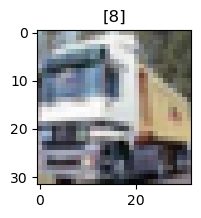

In [149]:
plot_sample(X_train, y_test, 1)

In [150]:
y_pred = CNN.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [152]:
y_pred[:5]   #value between 0 and 1 because of softmax

array([[1.0791970e-03, 4.4300244e-04, 3.8268283e-02, 8.2250780e-01,
        2.4728237e-03, 9.9245600e-02, 1.3473832e-02, 1.4191472e-03,
        2.0821892e-02, 2.6832253e-04],
       [6.9347225e-02, 6.8468654e-01, 4.2605907e-06, 4.2970983e-05,
        4.3381468e-07, 1.9316180e-06, 1.5001815e-07, 5.5739986e-07,
        2.3671830e-01, 9.1976654e-03],
       [2.5075820e-01, 2.7015075e-01, 2.1296351e-03, 1.1070699e-02,
        2.3750425e-03, 5.9905369e-04, 3.9379003e-05, 1.5095695e-03,
        4.4945312e-01, 1.1914558e-02],
       [8.6023629e-01, 4.5933207e-03, 1.3435201e-02, 9.0502771e-03,
        5.9820578e-02, 4.9094425e-04, 3.7493819e-04, 1.4180428e-03,
        5.0483078e-02, 9.7284086e-05],
       [6.0939215e-05, 7.8378845e-04, 2.8481690e-02, 1.5872306e-01,
        3.7580985e-01, 9.8514250e-03, 4.2524672e-01, 3.3938108e-05,
        9.8724174e-04, 2.1302956e-05]], dtype=float32)

In [153]:
np.argmax([5,23,15,76])

3

In [154]:
np.argmax(y_pred[1])

1

In [155]:
y_classes = [np.argmax(element) for element in y_pred]

In [157]:
y_classes[:5]

[3, 1, 8, 0, 6]

In [159]:
y_test[:5].reshape(-1,)

array([3, 8, 8, 0, 6], dtype=uint8)

In [160]:
print('Classification Report: \n', classification_report(y_test, y_classes) )

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.69      0.89      0.78      1000
           2       0.55      0.62      0.58      1000
           3       0.46      0.55      0.50      1000
           4       0.70      0.51      0.59      1000
           5       0.61      0.56      0.58      1000
           6       0.83      0.71      0.77      1000
           7       0.73      0.74      0.73      1000
           8       0.81      0.76      0.78      1000
           9       0.83      0.65      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000

